In [33]:
## import packages and modules
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
# show plots inline
%matplotlib inline
## dataset path
filename = r'D:\wkspacePY\STA 141C\project\data.csv'
## set default figure size
figure_size = (15,10)

In [65]:
## load dataset
# set column 'shot_id' as index because it is subjective and unique
# parse the dates in column 'game_date'
full_df = pd.read_csv(filename, parse_dates=['game_date'], index_col='shot_id')
# view first 3 lines
full_df[:3]
# list all features
print(full_df.columns.values)
# categorize some feature
categorical_var = ['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'playoffs', 'season',
                  'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range','team_id',
                   'team_name', 'matchup', 'opponent']
response_variable = 'shot_made_flag'
#for c in categorical_var:
#    full_df[c] = full_df[c].astype('category')

['action_type' 'combined_shot_type' 'game_event_id' 'game_id' 'lat'
 'loc_x' 'loc_y' 'lon' 'minutes_remaining' 'period' 'playoffs' 'season'
 'seconds_remaining' 'shot_distance' 'shot_made_flag' 'shot_type'
 'shot_zone_area' 'shot_zone_basic' 'shot_zone_range' 'team_id'
 'team_name' 'game_date' 'matchup' 'opponent']


In [68]:
## information on dataset
## count missing data
"""
shot_made_flag is the result of shot!
Split filled data into Train/Dev/Test sets.
"""
def num_missing(x):
  return sum(x.isnull())

tmp_df = full_df.apply(num_missing, axis=0)
tmp_df = tmp_df[tmp_df.values != 0]/len(full_df.index)
print("feature\t missing rate")
print(tmp_df)
print('_'*40)
print(full_df.info())
print('_'*40)
print(full_df.describe(include=['O']))

feature	 missing rate
shot_made_flag    0.162882
dtype: float64
________________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30697 entries, 1 to 30697
Data columns (total 24 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object


In [96]:
"""
1. Dismiss team_name and team_id.
2. Redundant info on matchup and opponent, so delete matchup
3. Redundant info on game_id and game_date, considering at most one game a day, so delete game_id
4. Delete game_event_id, because it is subjective numbering.
5. info on season may be derived from game_date, so delete season

6. Create dummy variables for shot_type and playoffs.
check if datas are sparsely distributed in various types, or centralized in several specific types
full_df['action_type'].value_counts().plot(kind = 'bar')
"""
## select filled data
# split filled data to train_set and test_set
filled_df = full_df[full_df['shot_made_flag'].notnull()]
# train/test = 8/2
percentile = 0.2
train_set, test_set = train_test_split(filled_df, test_size = percentile)
## delete features
train_set.drop(['team_name','team_id','matchup','game_id','game_event_id', 'season'], axis=1)
train_categorical_var = ['action_type', 'combined_shot_type', 'playoffs','shot_type', 
                         'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'opponent']
time_series_var = 'game_date'
train_set.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent
shot_id,,,,,,,,,,,,,,,,,,,,,
1301,Jump Shot,Jump Shot,414,20000884,33.7913,-54,253,-118.3238,4,4,...,0.0,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2001-03-07,LAL vs. TOR,TOR
18608,Jump Shot,Jump Shot,10,21100341,33.8523,176,192,-118.0938,10,1,...,0.0,3PT Field Goal,Right Side Center(RC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2012-02-03,LAL @ DEN,DEN
13029,Finger Roll Layup Shot,Layup,257,20701122,34.0443,0,0,-118.2698,9,3,...,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2008-04-02,LAL vs. POR,POR
19030,Jump Shot,Jump Shot,380,21100589,33.6853,173,359,-118.0968,0,3,...,0.0,3PT Field Goal,Right Side Center(RC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2012-03-09,LAL @ MIN,MIN
8531,Jump Shot,Jump Shot,484,20500563,33.9043,212,140,-118.0578,3,5,...,0.0,3PT Field Goal,Right Side Center(RC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2006-01-19,LAL @ SAC,SAC


In [97]:
## summary for categorical variables
categorical_var_group_mean = []
for c in train_categorical_var:
    categorical_var_group_mean.append(
        train_set[[c,response_variable]].groupby([c]).mean().sort_values(by=response_variable, ascending=False))
assert(len(categorical_var_group_mean)==len(train_categorical_var))

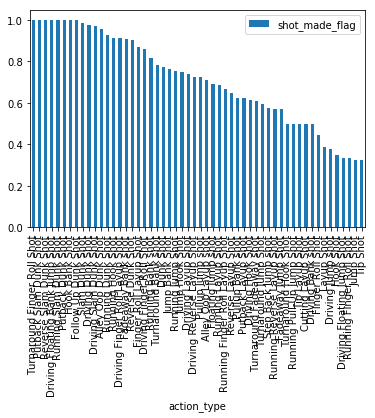

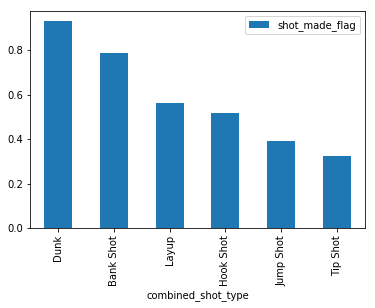

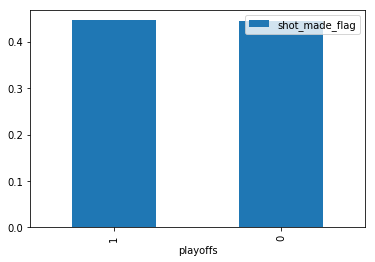

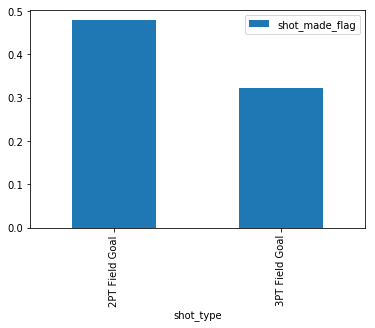

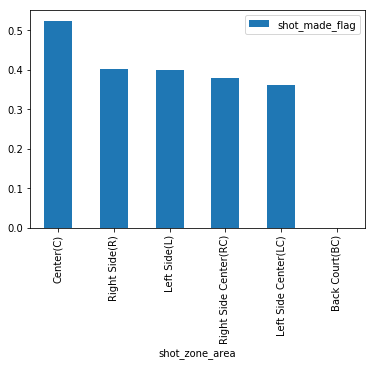

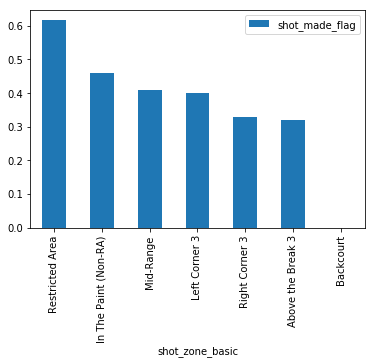

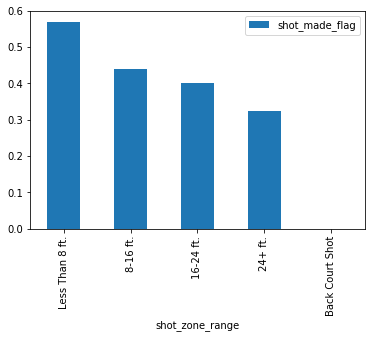

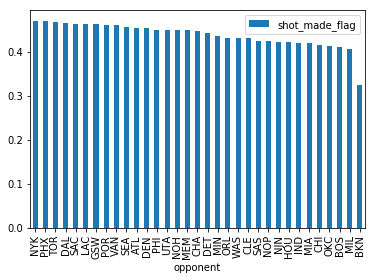

In [98]:
for c in categorical_var_group_mean:
    c.plot(kind = 'bar')